# IS5152 Project
## Beijing PM2.5 prediction

In [1]:
import os

# data manipulation
import pandas as pd
import numpy as np

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\PRSA_Data_Aotizhongxin_20130301-20170228.csv
data\PRSA_Data_Changping_20130301-20170228.csv
data\PRSA_Data_Dingling_20130301-20170228.csv
data\PRSA_Data_Dongsi_20130301-20170228.csv
data\PRSA_Data_Guanyuan_20130301-20170228.csv
data\PRSA_Data_Gucheng_20130301-20170228.csv
data\PRSA_Data_Huairou_20130301-20170228.csv
data\PRSA_Data_Nongzhanguan_20130301-20170228.csv
data\PRSA_Data_Shunyi_20130301-20170228.csv
data\PRSA_Data_Tiantan_20130301-20170228.csv
data\PRSA_Data_Wanliu_20130301-20170228.csv
data\PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [3]:
# Focus on one location first
df_tt = pd.read_csv('data/PRSA_Data_Tiantan_20130301-20170228.csv')
print(df_tt.dtypes)
df_tt.head(5)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


# Preliminary Analysis

In [4]:
df_tt.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [5]:
# missing value
df_tt.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

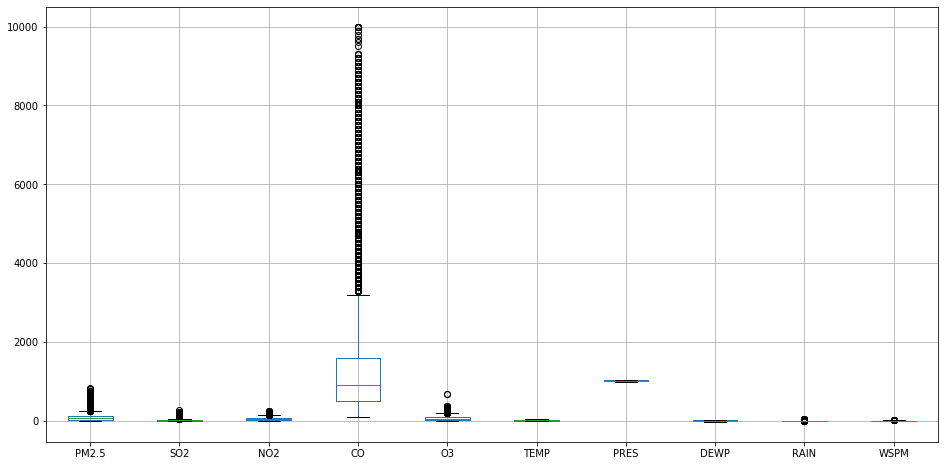

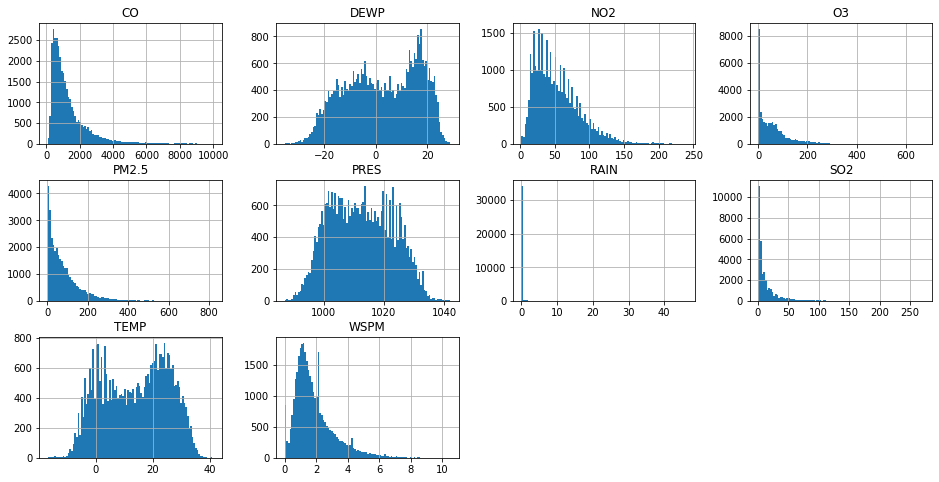

In [6]:
# drop columns
cols = ['No', 'year', 'month', 'day', 'hour', 'PM10', 'wd', 'station']
df = df_tt.drop(columns=cols)

df.boxplot(figsize=[16,8])
df.hist(bins=100, layout=(3,4), figsize=[16,8]);

# Data Cleaning

In [7]:
# replace missing value with mean
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

PM2.5    0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
WSPM     0
dtype: int64

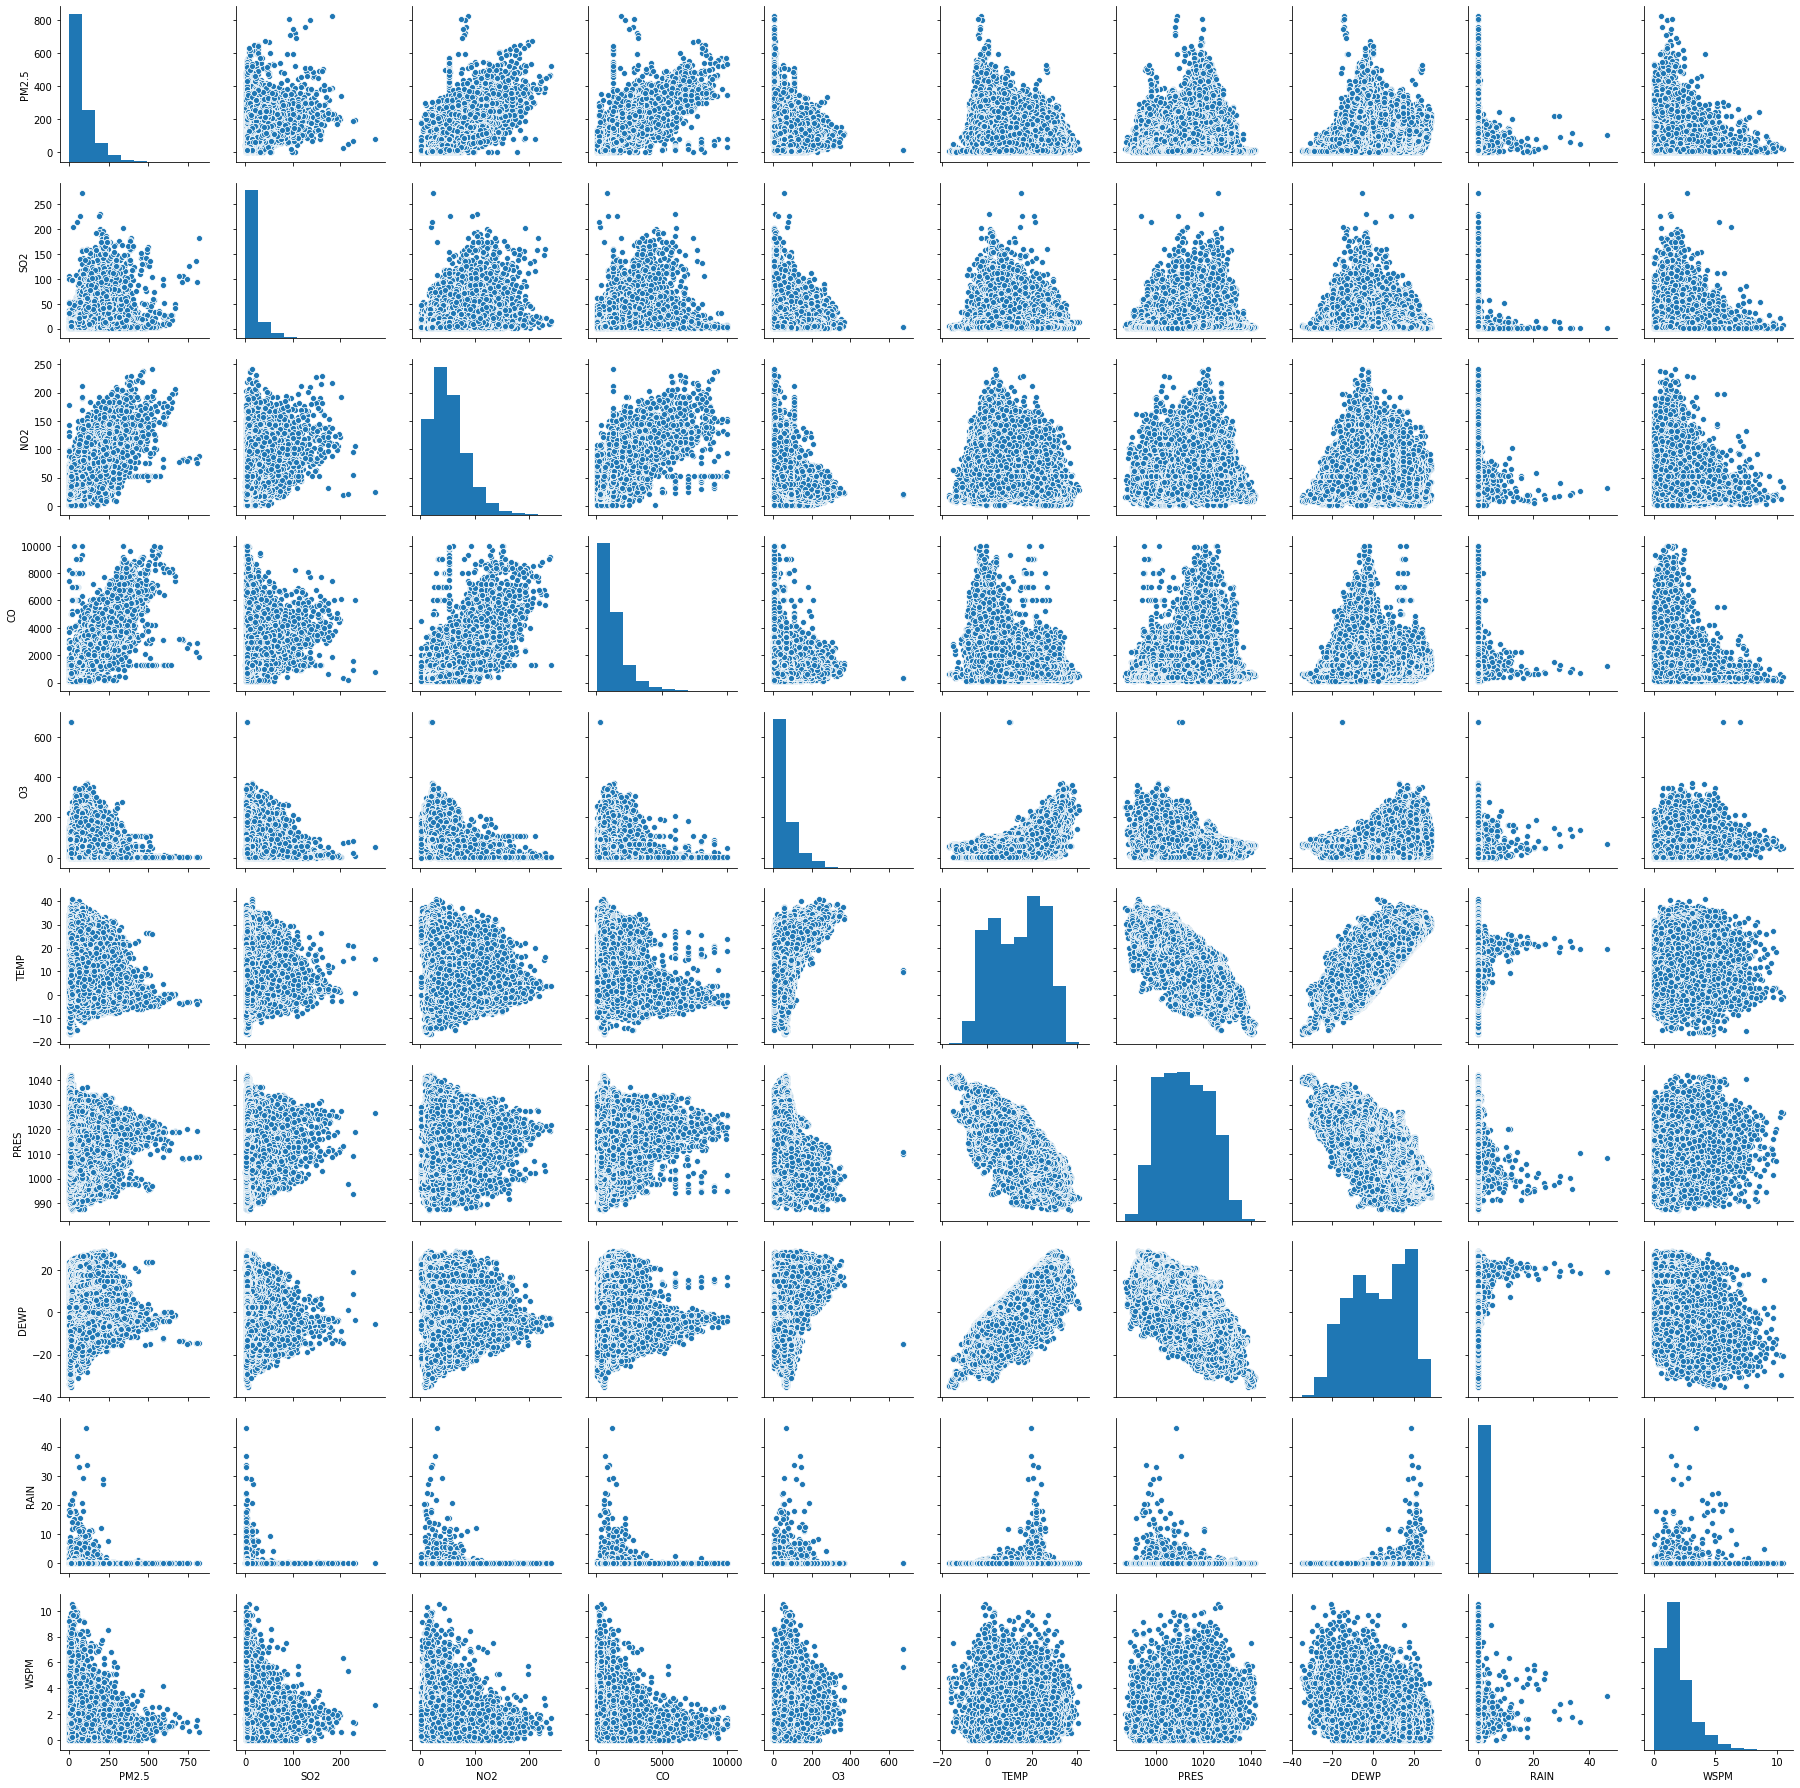

In [8]:
sb.pairplot(df)

# Feature Transformation

# Split data:

In [9]:
training_data_count = 25000
validation_data_count = 5000
#data is already sorted by time asc order in excel
training_df = df[0: training_data_count]
validation_df = df[training_data_count : training_data_count + validation_data_count]
test_df = df[training_data_count + validation_data_count ::]